**классификатор LSTM на Keras+TensorFlow: использование Embedding**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np
from numpy import random as rng

In [2]:
n_samples = 100 # количество примеров
seq_len = 3 # длина последовательности
max_num = 7

# генерируем последовательности целых чисел от 0 до max_num
x_train = rng.randint(0,max_num,(n_samples,seq_len))
x_train.shape

(100, 3)

In [3]:
x_train[:3,:]

array([[3, 6, 5],
       [1, 6, 2],
       [5, 1, 0]])

In [4]:
n_classes = 5

# размечаем примеры случайным образом
target = rng.randint(0,n_classes,n_samples)
y_train = np.eye(n_classes)[target]

y_train.shape

(100, 5)

In [5]:
y_train[:3,:]

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

---

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [7]:
embed_code_len = 8 # размер элемента последовательности

model = Sequential()
model.add(Embedding(input_dim=max_num, output_dim=embed_code_len, input_length=seq_len,))
model.add(LSTM(32) )
model.add(Dense(n_classes, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=1500, validation_split=.2 )         

Epoch 1/1500
3/3 [==============================] - 0s 118ms/step - loss: 1.6096 - accuracy: 0.1750 - val_loss: 1.6076 - val_accuracy: 0.4000
Epoch 2/1500
3/3 [==============================] - 0s 13ms/step - loss: 1.6084 - accuracy: 0.2125 - val_loss: 1.6075 - val_accuracy: 0.2000
Epoch 3/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.6070 - accuracy: 0.2750 - val_loss: 1.6074 - val_accuracy: 0.1500
Epoch 4/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.6058 - accuracy: 0.2875 - val_loss: 1.6073 - val_accuracy: 0.1500
Epoch 5/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.6049 - accuracy: 0.2875 - val_loss: 1.6071 - val_accuracy: 0.1500
Epoch 6/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.6038 - accuracy: 0.2625 - val_loss: 1.6070 - val_accuracy: 0.1500
Epoch 7/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.6027 - accuracy: 0.2500 - val_loss: 1.6070 - val_accuracy: 0.1500
Epoch 8/1500

Epoch 59/1500
3/3 [==============================] - ETA: 0s - loss: 1.5696 - accuracy: 0.25 - 0s 12ms/step - loss: 1.5225 - accuracy: 0.3000 - val_loss: 1.6764 - val_accuracy: 0.2500
Epoch 60/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.5204 - accuracy: 0.3125 - val_loss: 1.6780 - val_accuracy: 0.2500
Epoch 61/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.5187 - accuracy: 0.3000 - val_loss: 1.6788 - val_accuracy: 0.2500
Epoch 62/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.5153 - accuracy: 0.3125 - val_loss: 1.6778 - val_accuracy: 0.2500
Epoch 63/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.5129 - accuracy: 0.3000 - val_loss: 1.6784 - val_accuracy: 0.2500
Epoch 64/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.5116 - accuracy: 0.2875 - val_loss: 1.6781 - val_accuracy: 0.2500
Epoch 65/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.5089 - accuracy: 0.2875 - val_

Epoch 116/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4305 - accuracy: 0.4125 - val_loss: 1.8099 - val_accuracy: 0.1000
Epoch 117/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4299 - accuracy: 0.4125 - val_loss: 1.8133 - val_accuracy: 0.1000
Epoch 118/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4293 - accuracy: 0.4125 - val_loss: 1.8170 - val_accuracy: 0.1000
Epoch 119/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4283 - accuracy: 0.4000 - val_loss: 1.8182 - val_accuracy: 0.1000
Epoch 120/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4275 - accuracy: 0.4000 - val_loss: 1.8167 - val_accuracy: 0.1000
Epoch 121/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4266 - accuracy: 0.4000 - val_loss: 1.8170 - val_accuracy: 0.1000
Epoch 122/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.4255 - accuracy: 0.4000 - val_loss: 1.8190 - val_accuracy: 0.1000

3/3 [==============================] - 0s 12ms/step - loss: 1.3721 - accuracy: 0.4625 - val_loss: 1.9084 - val_accuracy: 0.1500
Epoch 174/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.3721 - accuracy: 0.4625 - val_loss: 1.9122 - val_accuracy: 0.1500
Epoch 175/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.3699 - accuracy: 0.4625 - val_loss: 1.9128 - val_accuracy: 0.1500
Epoch 176/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.3693 - accuracy: 0.4625 - val_loss: 1.9118 - val_accuracy: 0.1500
Epoch 177/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.3678 - accuracy: 0.4625 - val_loss: 1.9128 - val_accuracy: 0.1500
Epoch 178/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.3667 - accuracy: 0.4625 - val_loss: 1.9150 - val_accuracy: 0.1500
Epoch 179/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.3655 - accuracy: 0.4625 - val_loss: 1.9184 - val_accuracy: 0.1500
Epoch 180/1500

3/3 [==============================] - 0s 12ms/step - loss: 1.2903 - accuracy: 0.4375 - val_loss: 1.9940 - val_accuracy: 0.1500
Epoch 230/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.2891 - accuracy: 0.4125 - val_loss: 1.9973 - val_accuracy: 0.1500
Epoch 231/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.2878 - accuracy: 0.4125 - val_loss: 1.9975 - val_accuracy: 0.1500
Epoch 232/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.2860 - accuracy: 0.4000 - val_loss: 1.9984 - val_accuracy: 0.1500
Epoch 233/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.2850 - accuracy: 0.4000 - val_loss: 2.0001 - val_accuracy: 0.1500
Epoch 234/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.2830 - accuracy: 0.4000 - val_loss: 1.9997 - val_accuracy: 0.1500
Epoch 235/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.2808 - accuracy: 0.4000 - val_loss: 2.0011 - val_accuracy: 0.1500
Epoch 236/1500

3/3 [==============================] - 0s 12ms/step - loss: 1.1874 - accuracy: 0.5250 - val_loss: 2.1071 - val_accuracy: 0.1500
Epoch 287/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.1852 - accuracy: 0.5250 - val_loss: 2.1124 - val_accuracy: 0.1500
Epoch 288/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.1826 - accuracy: 0.5250 - val_loss: 2.1197 - val_accuracy: 0.1500
Epoch 289/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.1804 - accuracy: 0.5250 - val_loss: 2.1297 - val_accuracy: 0.1500
Epoch 290/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.1786 - accuracy: 0.5250 - val_loss: 2.1405 - val_accuracy: 0.1500
Epoch 291/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.1760 - accuracy: 0.5500 - val_loss: 2.1488 - val_accuracy: 0.1500
Epoch 292/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.1745 - accuracy: 0.5375 - val_loss: 2.1536 - val_accuracy: 0.1000
Epoch 293/1500

3/3 [==============================] - 0s 12ms/step - loss: 1.0368 - accuracy: 0.6250 - val_loss: 2.3493 - val_accuracy: 0.2500
Epoch 344/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.0340 - accuracy: 0.6250 - val_loss: 2.3504 - val_accuracy: 0.2500
Epoch 345/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.0308 - accuracy: 0.6250 - val_loss: 2.3508 - val_accuracy: 0.2500
Epoch 346/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.0279 - accuracy: 0.6375 - val_loss: 2.3539 - val_accuracy: 0.3000
Epoch 347/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.0255 - accuracy: 0.6375 - val_loss: 2.3604 - val_accuracy: 0.3000
Epoch 348/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.0219 - accuracy: 0.6375 - val_loss: 2.3692 - val_accuracy: 0.3000
Epoch 349/1500
3/3 [==============================] - 0s 12ms/step - loss: 1.0187 - accuracy: 0.6375 - val_loss: 2.3762 - val_accuracy: 0.3000
Epoch 350/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.8351 - accuracy: 0.7250 - val_loss: 2.6414 - val_accuracy: 0.2000
Epoch 401/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.8313 - accuracy: 0.7250 - val_loss: 2.6486 - val_accuracy: 0.2000
Epoch 402/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.8279 - accuracy: 0.7250 - val_loss: 2.6583 - val_accuracy: 0.2000
Epoch 403/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.8241 - accuracy: 0.7250 - val_loss: 2.6689 - val_accuracy: 0.2000
Epoch 404/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.8203 - accuracy: 0.7250 - val_loss: 2.6800 - val_accuracy: 0.2000
Epoch 405/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.8175 - accuracy: 0.7125 - val_loss: 2.6922 - val_accuracy: 0.2000
Epoch 406/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.8131 - accuracy: 0.7125 - val_loss: 2.6990 - val_accuracy: 0.2000
Epoch 407/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.6227 - accuracy: 0.7500 - val_loss: 3.0810 - val_accuracy: 0.2000
Epoch 458/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.6181 - accuracy: 0.7500 - val_loss: 3.0903 - val_accuracy: 0.2000
Epoch 459/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.6144 - accuracy: 0.7500 - val_loss: 3.0972 - val_accuracy: 0.2000
Epoch 460/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.6108 - accuracy: 0.7500 - val_loss: 3.1026 - val_accuracy: 0.2000
Epoch 461/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.6073 - accuracy: 0.7625 - val_loss: 3.1056 - val_accuracy: 0.2000
Epoch 462/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.6036 - accuracy: 0.7750 - val_loss: 3.1105 - val_accuracy: 0.2000
Epoch 463/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.6008 - accuracy: 0.7750 - val_loss: 3.1170 - val_accuracy: 0.2000
Epoch 464/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.4273 - accuracy: 0.8500 - val_loss: 3.6231 - val_accuracy: 0.0500
Epoch 515/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.4245 - accuracy: 0.8500 - val_loss: 3.6354 - val_accuracy: 0.0500
Epoch 516/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.4219 - accuracy: 0.8500 - val_loss: 3.6425 - val_accuracy: 0.0500
Epoch 517/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.4188 - accuracy: 0.8500 - val_loss: 3.6532 - val_accuracy: 0.0500
Epoch 518/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.4168 - accuracy: 0.8500 - val_loss: 3.6605 - val_accuracy: 0.0500
Epoch 519/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.4131 - accuracy: 0.8500 - val_loss: 3.6697 - val_accuracy: 0.0500
Epoch 520/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.4099 - accuracy: 0.8625 - val_loss: 3.6743 - val_accuracy: 0.1000
Epoch 521/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.3026 - accuracy: 0.9125 - val_loss: 4.0676 - val_accuracy: 0.0500
Epoch 572/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.3020 - accuracy: 0.9125 - val_loss: 4.0710 - val_accuracy: 0.0500
Epoch 573/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.3012 - accuracy: 0.9125 - val_loss: 4.0776 - val_accuracy: 0.0500
Epoch 574/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.3007 - accuracy: 0.9000 - val_loss: 4.0776 - val_accuracy: 0.1000
Epoch 575/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2980 - accuracy: 0.9125 - val_loss: 4.0855 - val_accuracy: 0.1000
Epoch 576/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2955 - accuracy: 0.9125 - val_loss: 4.0910 - val_accuracy: 0.1000
Epoch 577/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2965 - accuracy: 0.9000 - val_loss: 4.0984 - val_accuracy: 0.1000
Epoch 578/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.2353 - accuracy: 0.9125 - val_loss: 4.3809 - val_accuracy: 0.1000
Epoch 629/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2349 - accuracy: 0.9125 - val_loss: 4.3843 - val_accuracy: 0.1000
Epoch 630/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2350 - accuracy: 0.9125 - val_loss: 4.3890 - val_accuracy: 0.1000
Epoch 631/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2337 - accuracy: 0.9125 - val_loss: 4.3971 - val_accuracy: 0.1000
Epoch 632/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2324 - accuracy: 0.9125 - val_loss: 4.4053 - val_accuracy: 0.1000
Epoch 633/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2314 - accuracy: 0.9000 - val_loss: 4.4131 - val_accuracy: 0.0500
Epoch 634/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.2309 - accuracy: 0.9125 - val_loss: 4.4186 - val_accuracy: 0.0500
Epoch 635/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.2006 - accuracy: 0.9125 - val_loss: 4.6322 - val_accuracy: 0.1000
Epoch 686/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1996 - accuracy: 0.9125 - val_loss: 4.6407 - val_accuracy: 0.1000
Epoch 687/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1986 - accuracy: 0.9125 - val_loss: 4.6472 - val_accuracy: 0.1000
Epoch 688/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1969 - accuracy: 0.9125 - val_loss: 4.6564 - val_accuracy: 0.1000
Epoch 689/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1992 - accuracy: 0.9000 - val_loss: 4.6691 - val_accuracy: 0.0500
Epoch 690/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1958 - accuracy: 0.9125 - val_loss: 4.6758 - val_accuracy: 0.0500
Epoch 691/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1963 - accuracy: 0.9125 - val_loss: 4.6816 - val_accuracy: 0.0500
Epoch 692/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.1776 - accuracy: 0.9000 - val_loss: 4.8730 - val_accuracy: 0.0500
Epoch 743/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1771 - accuracy: 0.9125 - val_loss: 4.8683 - val_accuracy: 0.0500
Epoch 744/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1766 - accuracy: 0.9125 - val_loss: 4.8624 - val_accuracy: 0.0500
Epoch 745/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1754 - accuracy: 0.9125 - val_loss: 4.8608 - val_accuracy: 0.0500
Epoch 746/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1763 - accuracy: 0.9125 - val_loss: 4.8588 - val_accuracy: 0.0500
Epoch 747/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1746 - accuracy: 0.9125 - val_loss: 4.8613 - val_accuracy: 0.0500
Epoch 748/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1747 - accuracy: 0.9125 - val_loss: 4.8681 - val_accuracy: 0.0500
Epoch 749/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.1627 - accuracy: 0.9000 - val_loss: 5.0195 - val_accuracy: 0.1000
Epoch 800/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1645 - accuracy: 0.9000 - val_loss: 5.0190 - val_accuracy: 0.1000
Epoch 801/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1649 - accuracy: 0.9000 - val_loss: 5.0271 - val_accuracy: 0.1000
Epoch 802/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1640 - accuracy: 0.9125 - val_loss: 5.0346 - val_accuracy: 0.1000
Epoch 803/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1622 - accuracy: 0.9125 - val_loss: 5.0401 - val_accuracy: 0.1000
Epoch 804/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1621 - accuracy: 0.9000 - val_loss: 5.0440 - val_accuracy: 0.1000
Epoch 805/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1614 - accuracy: 0.9000 - val_loss: 5.0474 - val_accuracy: 0.1000
Epoch 806/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.1554 - accuracy: 0.9125 - val_loss: 5.1597 - val_accuracy: 0.1000
Epoch 857/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1550 - accuracy: 0.9125 - val_loss: 5.1598 - val_accuracy: 0.1000
Epoch 858/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1548 - accuracy: 0.9000 - val_loss: 5.1617 - val_accuracy: 0.1000
Epoch 859/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1553 - accuracy: 0.9125 - val_loss: 5.1680 - val_accuracy: 0.1000
Epoch 860/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1536 - accuracy: 0.9125 - val_loss: 5.1784 - val_accuracy: 0.1000
Epoch 861/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1533 - accuracy: 0.9125 - val_loss: 5.1870 - val_accuracy: 0.0500
Epoch 862/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1537 - accuracy: 0.9125 - val_loss: 5.1943 - val_accuracy: 0.0500
Epoch 863/1500

3/3 [==============================] - 0s 12ms/step - loss: 0.1482 - accuracy: 0.9125 - val_loss: 5.2796 - val_accuracy: 0.1000
Epoch 914/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1492 - accuracy: 0.9125 - val_loss: 5.2770 - val_accuracy: 0.1000
Epoch 915/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1484 - accuracy: 0.9125 - val_loss: 5.2804 - val_accuracy: 0.1000
Epoch 916/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1488 - accuracy: 0.9000 - val_loss: 5.2877 - val_accuracy: 0.0500
Epoch 917/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1493 - accuracy: 0.9125 - val_loss: 5.2967 - val_accuracy: 0.0500
Epoch 918/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1492 - accuracy: 0.9125 - val_loss: 5.3050 - val_accuracy: 0.0500
Epoch 919/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1494 - accuracy: 0.9125 - val_loss: 5.3074 - val_accuracy: 0.0500
Epoch 920/1500

Epoch 970/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1435 - accuracy: 0.9125 - val_loss: 5.4143 - val_accuracy: 0.1000
Epoch 971/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1436 - accuracy: 0.9125 - val_loss: 5.4154 - val_accuracy: 0.1000
Epoch 972/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1427 - accuracy: 0.9125 - val_loss: 5.4156 - val_accuracy: 0.1000
Epoch 973/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1437 - accuracy: 0.9000 - val_loss: 5.4118 - val_accuracy: 0.1000
Epoch 974/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1439 - accuracy: 0.9125 - val_loss: 5.4138 - val_accuracy: 0.1000
Epoch 975/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1435 - accuracy: 0.9000 - val_loss: 5.4183 - val_accuracy: 0.1000
Epoch 976/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1433 - accuracy: 0.9125 - val_loss: 5.4220 - val_accuracy: 0.1000

3/3 [==============================] - 0s 12ms/step - loss: 0.1404 - accuracy: 0.9125 - val_loss: 5.5232 - val_accuracy: 0.0500
Epoch 1028/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1433 - accuracy: 0.9125 - val_loss: 5.5357 - val_accuracy: 0.0500
Epoch 1029/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1409 - accuracy: 0.9125 - val_loss: 5.5363 - val_accuracy: 0.0500
Epoch 1030/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1422 - accuracy: 0.9125 - val_loss: 5.5350 - val_accuracy: 0.0500
Epoch 1031/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1412 - accuracy: 0.9125 - val_loss: 5.5327 - val_accuracy: 0.0500
Epoch 1032/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1404 - accuracy: 0.9125 - val_loss: 5.5312 - val_accuracy: 0.0500
Epoch 1033/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1414 - accuracy: 0.9125 - val_loss: 5.5290 - val_accuracy: 0.1000
Epoch 10

3/3 [==============================] - 0s 12ms/step - loss: 0.1387 - accuracy: 0.9125 - val_loss: 5.6001 - val_accuracy: 0.1000
Epoch 1085/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1389 - accuracy: 0.9125 - val_loss: 5.6064 - val_accuracy: 0.1000
Epoch 1086/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1384 - accuracy: 0.9125 - val_loss: 5.6139 - val_accuracy: 0.1000
Epoch 1087/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1389 - accuracy: 0.9000 - val_loss: 5.6193 - val_accuracy: 0.0500
Epoch 1088/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1386 - accuracy: 0.9000 - val_loss: 5.6230 - val_accuracy: 0.1000
Epoch 1089/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1380 - accuracy: 0.9000 - val_loss: 5.6258 - val_accuracy: 0.1000
Epoch 1090/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1383 - accuracy: 0.8875 - val_loss: 5.6278 - val_accuracy: 0.0500
Epoch 10

3/3 [==============================] - 0s 13ms/step - loss: 0.1359 - accuracy: 0.9125 - val_loss: 5.7102 - val_accuracy: 0.0500
Epoch 1141/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1368 - accuracy: 0.9125 - val_loss: 5.7058 - val_accuracy: 0.0500
Epoch 1142/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1359 - accuracy: 0.9125 - val_loss: 5.7027 - val_accuracy: 0.0500
Epoch 1143/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1363 - accuracy: 0.9000 - val_loss: 5.7004 - val_accuracy: 0.0500
Epoch 1144/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1357 - accuracy: 0.9125 - val_loss: 5.6996 - val_accuracy: 0.1000
Epoch 1145/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1356 - accuracy: 0.9125 - val_loss: 5.7002 - val_accuracy: 0.1000
Epoch 1146/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1351 - accuracy: 0.9125 - val_loss: 5.7003 - val_accuracy: 0.1000
Epoch 11

3/3 [==============================] - 0s 12ms/step - loss: 0.1340 - accuracy: 0.9125 - val_loss: 5.7812 - val_accuracy: 0.0500
Epoch 1198/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1337 - accuracy: 0.9125 - val_loss: 5.7830 - val_accuracy: 0.0500
Epoch 1199/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1346 - accuracy: 0.9125 - val_loss: 5.7800 - val_accuracy: 0.0500
Epoch 1200/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1342 - accuracy: 0.9125 - val_loss: 5.7794 - val_accuracy: 0.0500
Epoch 1201/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1346 - accuracy: 0.9125 - val_loss: 5.7788 - val_accuracy: 0.1000
Epoch 1202/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1344 - accuracy: 0.9000 - val_loss: 5.7806 - val_accuracy: 0.1000
Epoch 1203/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1342 - accuracy: 0.9000 - val_loss: 5.7820 - val_accuracy: 0.1000
Epoch 12

Epoch 1254/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1329 - accuracy: 0.9125 - val_loss: 5.8345 - val_accuracy: 0.1000
Epoch 1255/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1330 - accuracy: 0.9125 - val_loss: 5.8340 - val_accuracy: 0.0500
Epoch 1256/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1336 - accuracy: 0.9125 - val_loss: 5.8370 - val_accuracy: 0.0500
Epoch 1257/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1332 - accuracy: 0.9000 - val_loss: 5.8399 - val_accuracy: 0.1000
Epoch 1258/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1347 - accuracy: 0.9125 - val_loss: 5.8418 - val_accuracy: 0.1000
Epoch 1259/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1340 - accuracy: 0.9125 - val_loss: 5.8481 - val_accuracy: 0.0500
Epoch 1260/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1348 - accuracy: 0.9125 - val_loss: 5.8533 - val_accuracy:

3/3 [==============================] - 0s 12ms/step - loss: 0.1320 - accuracy: 0.9000 - val_loss: 5.9169 - val_accuracy: 0.1000
Epoch 1311/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1315 - accuracy: 0.9000 - val_loss: 5.9217 - val_accuracy: 0.1000
Epoch 1312/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1320 - accuracy: 0.9125 - val_loss: 5.9254 - val_accuracy: 0.1000
Epoch 1313/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1322 - accuracy: 0.9125 - val_loss: 5.9278 - val_accuracy: 0.1000
Epoch 1314/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1328 - accuracy: 0.9000 - val_loss: 5.9337 - val_accuracy: 0.0500
Epoch 1315/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1321 - accuracy: 0.9125 - val_loss: 5.9353 - val_accuracy: 0.0500
Epoch 1316/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1328 - accuracy: 0.9125 - val_loss: 5.9370 - val_accuracy: 0.0500
Epoch 13

3/3 [==============================] - 0s 12ms/step - loss: 0.1315 - accuracy: 0.9000 - val_loss: 5.9959 - val_accuracy: 0.1000
Epoch 1368/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1314 - accuracy: 0.9000 - val_loss: 5.9981 - val_accuracy: 0.1000
Epoch 1369/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1306 - accuracy: 0.9000 - val_loss: 6.0001 - val_accuracy: 0.1000
Epoch 1370/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1316 - accuracy: 0.9000 - val_loss: 6.0010 - val_accuracy: 0.1000
Epoch 1371/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1314 - accuracy: 0.9125 - val_loss: 6.0033 - val_accuracy: 0.1000
Epoch 1372/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1303 - accuracy: 0.9000 - val_loss: 6.0089 - val_accuracy: 0.0500
Epoch 1373/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1318 - accuracy: 0.9125 - val_loss: 6.0158 - val_accuracy: 0.0500
Epoch 13

Epoch 1424/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1304 - accuracy: 0.9000 - val_loss: 6.0510 - val_accuracy: 0.0500
Epoch 1425/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1305 - accuracy: 0.9000 - val_loss: 6.0508 - val_accuracy: 0.0500
Epoch 1426/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1302 - accuracy: 0.9125 - val_loss: 6.0525 - val_accuracy: 0.1000
Epoch 1427/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1300 - accuracy: 0.9125 - val_loss: 6.0529 - val_accuracy: 0.1000
Epoch 1428/1500
3/3 [==============================] - 0s 13ms/step - loss: 0.1301 - accuracy: 0.9000 - val_loss: 6.0540 - val_accuracy: 0.1000
Epoch 1429/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1296 - accuracy: 0.9125 - val_loss: 6.0589 - val_accuracy: 0.0500
Epoch 1430/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1316 - accuracy: 0.9000 - val_loss: 6.0630 - val_accuracy:

Epoch 1481/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1298 - accuracy: 0.9125 - val_loss: 6.1079 - val_accuracy: 0.1000
Epoch 1482/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1306 - accuracy: 0.9000 - val_loss: 6.1127 - val_accuracy: 0.1000
Epoch 1483/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1295 - accuracy: 0.9125 - val_loss: 6.1140 - val_accuracy: 0.1000
Epoch 1484/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1305 - accuracy: 0.9000 - val_loss: 6.1166 - val_accuracy: 0.0500
Epoch 1485/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1298 - accuracy: 0.9125 - val_loss: 6.1145 - val_accuracy: 0.0500
Epoch 1486/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1291 - accuracy: 0.9125 - val_loss: 6.1149 - val_accuracy: 0.0500
Epoch 1487/1500
3/3 [==============================] - 0s 12ms/step - loss: 0.1297 - accuracy: 0.9125 - val_loss: 6.1110 - val_accuracy:

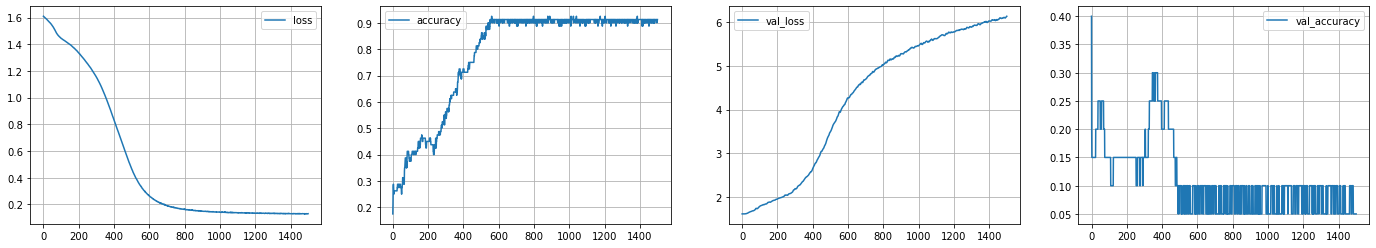

In [11]:
from matplotlib import pyplot as plt

k = hist.history.keys()

w,h = 6,4

fig,ax = plt.subplots(1,len(k),figsize=(w*len(k),h))
for i,n in enumerate(k):
    ax[i].plot(hist.history[n],label=n)
    ax[i].grid(True)
    ax[i].legend()